In [35]:
# 파일을 불러오기 위한 라이브러리
import pandas as pd

# 데이터를 시각화하기 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 경고 메시지 무시를 위한 라이브러리
import warnings
warnings.filterwarnings("ignore")

### 먼저 모든 열을 그룹화하고 그룹별 G1 값의 분포를 살펴보았습니다

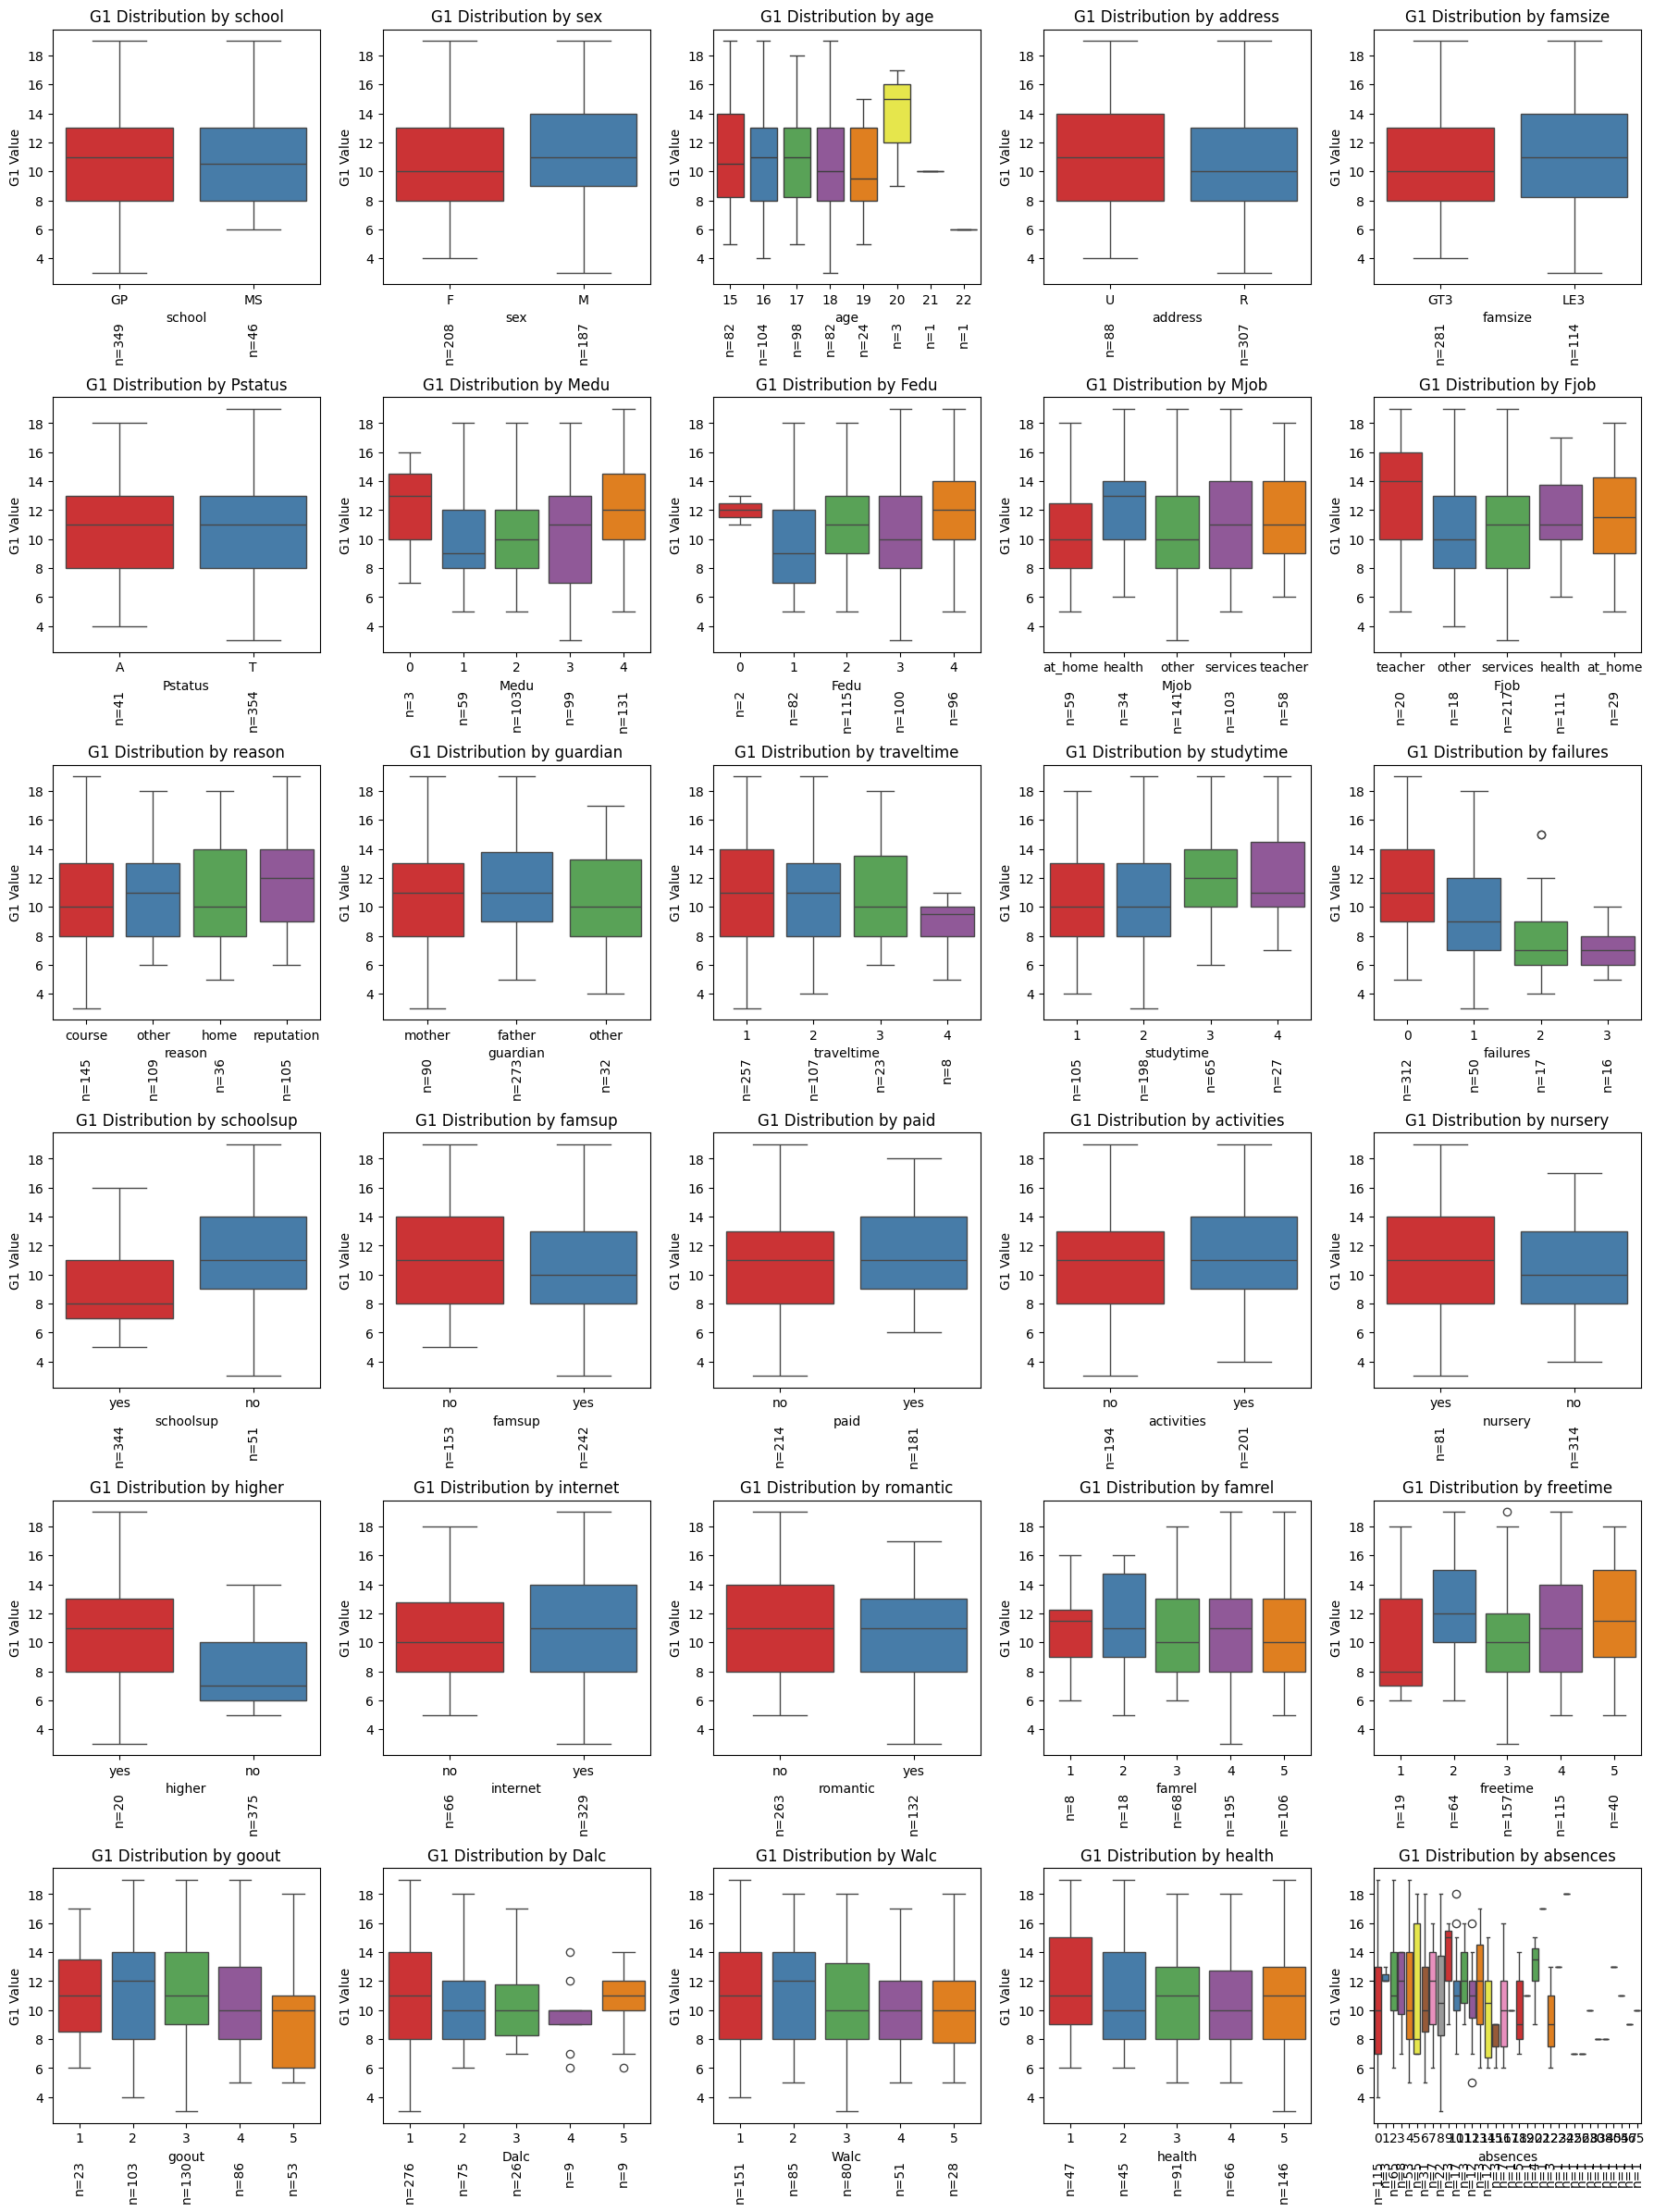

In [36]:
# raw data를 불러옵니다
data = pd.read_csv('train-student-mat.csv')

# 열 각각에 따라 그룹화한 후에 G1 값의 분포를 박스 플롯으로 확인하는 함수
def plot_grouped_boxplot(data, group_column, ax):
    sns.boxplot(x=group_column, y='G1', data=data, ax=ax, palette='Set1')  # 박스 플롯 그리기
    add_count_labels(ax, data, group_column)  # G1 값의 개수 표시
    ax.set_title(f'G1 Distribution by {group_column}')
    ax.set_xlabel(group_column)
    ax.set_ylabel('G1 Value')

def add_count_labels(ax, data, group_column):
    # 각 그룹별 'G1' 값의 개수를 계산
    counts = data.groupby(group_column)['G1'].count().reset_index()
    # 박스 플롯 위에 개수 세로로 표시
    for i, count in enumerate(counts['G1']):
        ax.text(i, -0.3, f'n={count}', ha='center', va='top', fontsize=10, rotation = 90)

# 6*5 서브플롯 생성
fig, axs = plt.subplots(6, 5, figsize=(18, 24))

# 각 열에 대해 박스 플롯 그리기
for i, column in enumerate(data.columns[:-1]):
    row = i // 5
    col = i % 5
    plot_grouped_boxplot(data, column, axs[row, col])

# 빈 서브플롯 숨기기
for i in range(len(data.columns) - 1, 30):
    row = i // 5
    col = i % 5
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()


### 다음과 같이 데이터분포가 다르다고 생각되는 열을 추출하고 각 열을 살펴보았습니다.

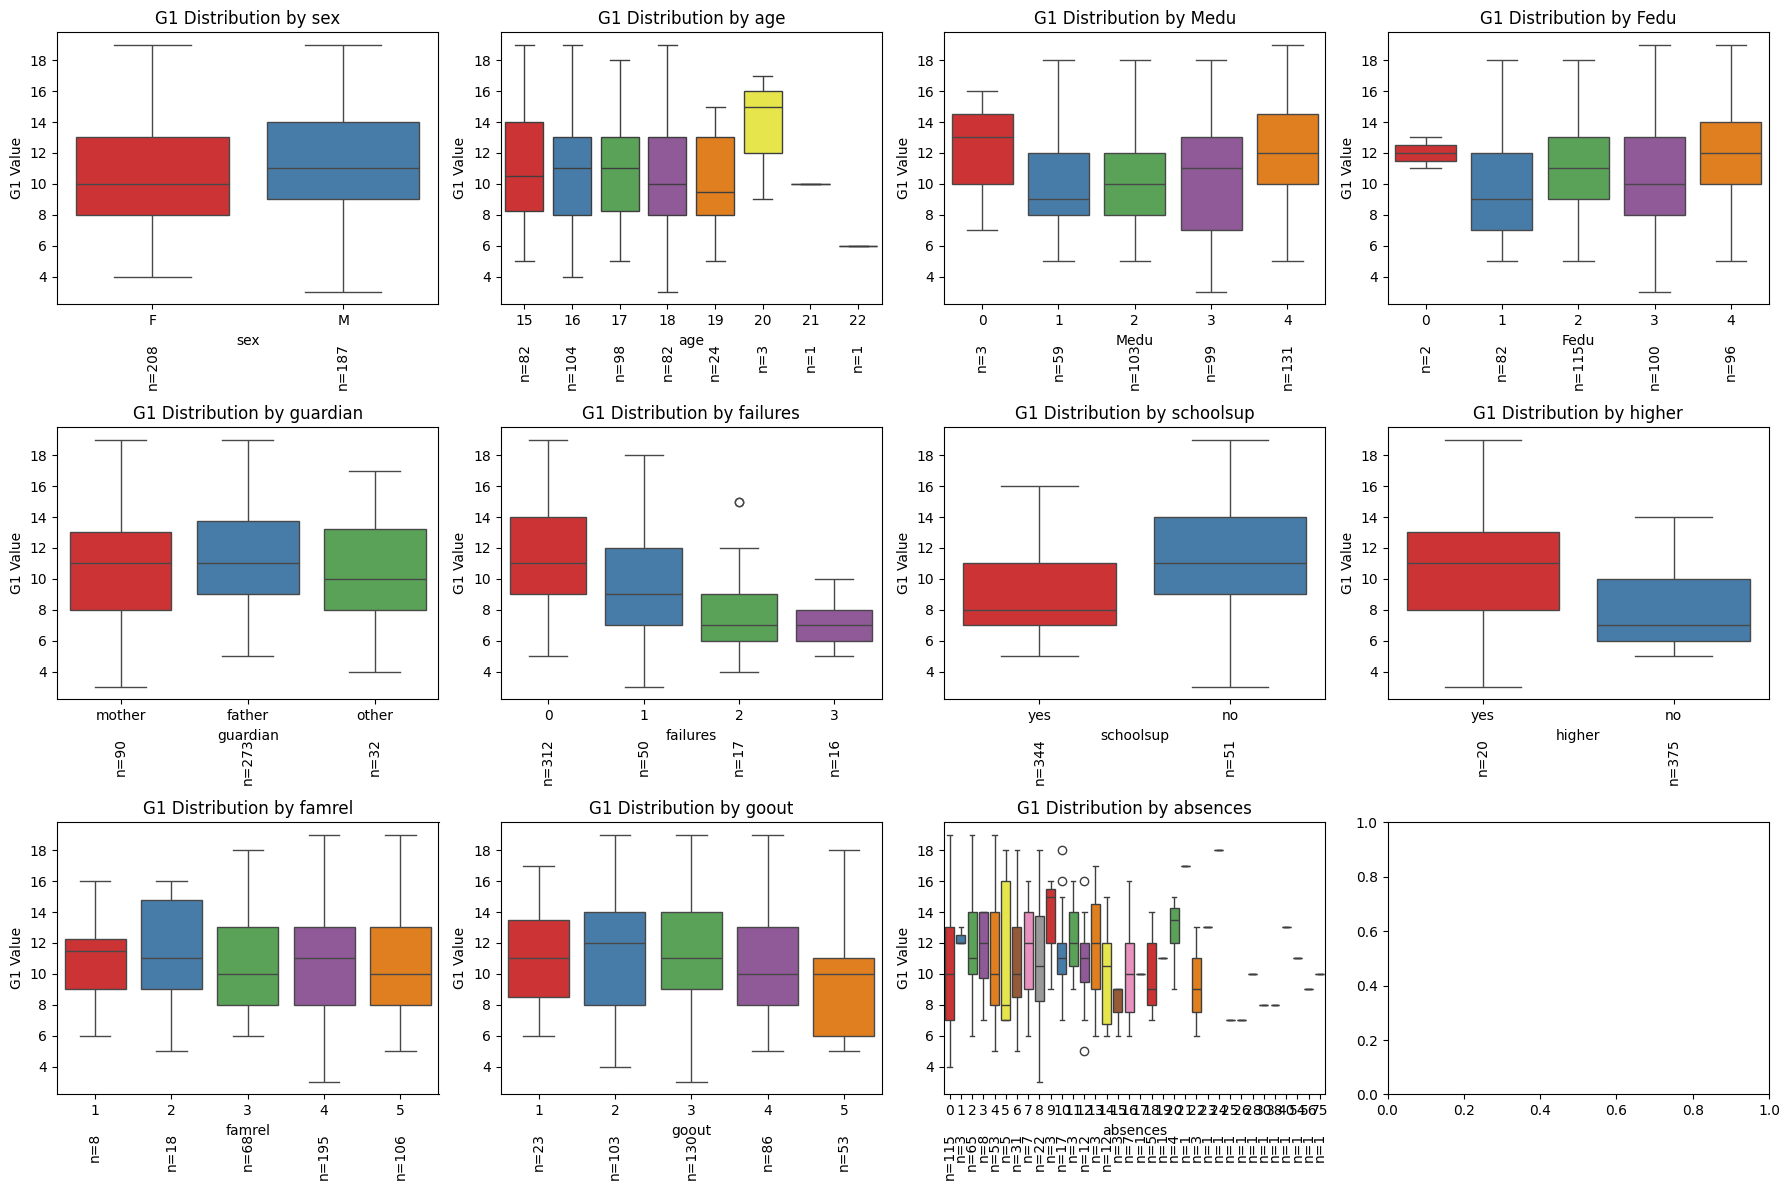

In [37]:
# 데이터프레임에서 필요한 열만 추출하여 새로운 데이터프레임 생성
selected_columns = ['sex','age','Medu','Fedu','guardian','failures','schoolsup','higher','famrel','goout','absences','G1']
selected_data = data[selected_columns]

# 열 각각에 따라 그룹화한 후에 G1 값의 분포를 박스 플롯으로 확인하는 함수
def plot_grouped_boxplot(data, group_column, ax):
    sns.boxplot(x=group_column, y='G1', data=data, ax=ax, palette='Set1')  # 박스 플롯 그리기
    add_count_labels(ax, data, group_column)  # G1 값의 개수 표시
    ax.set_title(f'G1 Distribution by {group_column}')
    ax.set_xlabel(group_column)
    ax.set_ylabel('G1 Value')

def add_count_labels(ax, data, group_column):
    # 각 그룹별 'G1' 값의 개수를 계산
    counts = data.groupby(group_column)['G1'].count().reset_index()
    # 박스 플롯 위에 개수 세로로 표시
    for i, count in enumerate(counts['G1']):
        ax.text(i, -0.3, f'n={count}', ha='center', va='top', fontsize=10, rotation = 90)

# 3*4 서브플롯 생성
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# 각 열에 대해 박스 플롯 그리기
for i, column in enumerate(selected_data.columns[:-1]):
    row = i // 4
    col = i % 4
    plot_grouped_boxplot(selected_data, column, axs[row, col])

# 빈 서브플롯 숨기기
for i in range(len(selected_data.columns) - 1, 11):
    row = i // 4
    col = i % 4
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

### 도메인 지식을 활용하여 Medu, Fedu, guardian 열을 특징공학을 통해 하나의 열로 만들기로 했습니다.

In [38]:
data['guardian_power'] = data.apply(lambda row: row['Medu'] * 0.7 + row['Fedu'] * 0.3 if row['guardian'] == 'mother' else 
                                    (row['Medu'] * 0.3 + row['Fedu'] * 0.7 if row['guardian'] == 'father' else 1), axis=1)
data['guardian_power'] = data['guardian_power'].apply(lambda x : round(x,2))

### 데이터 분포를 최종적으로 확인하였습니다.

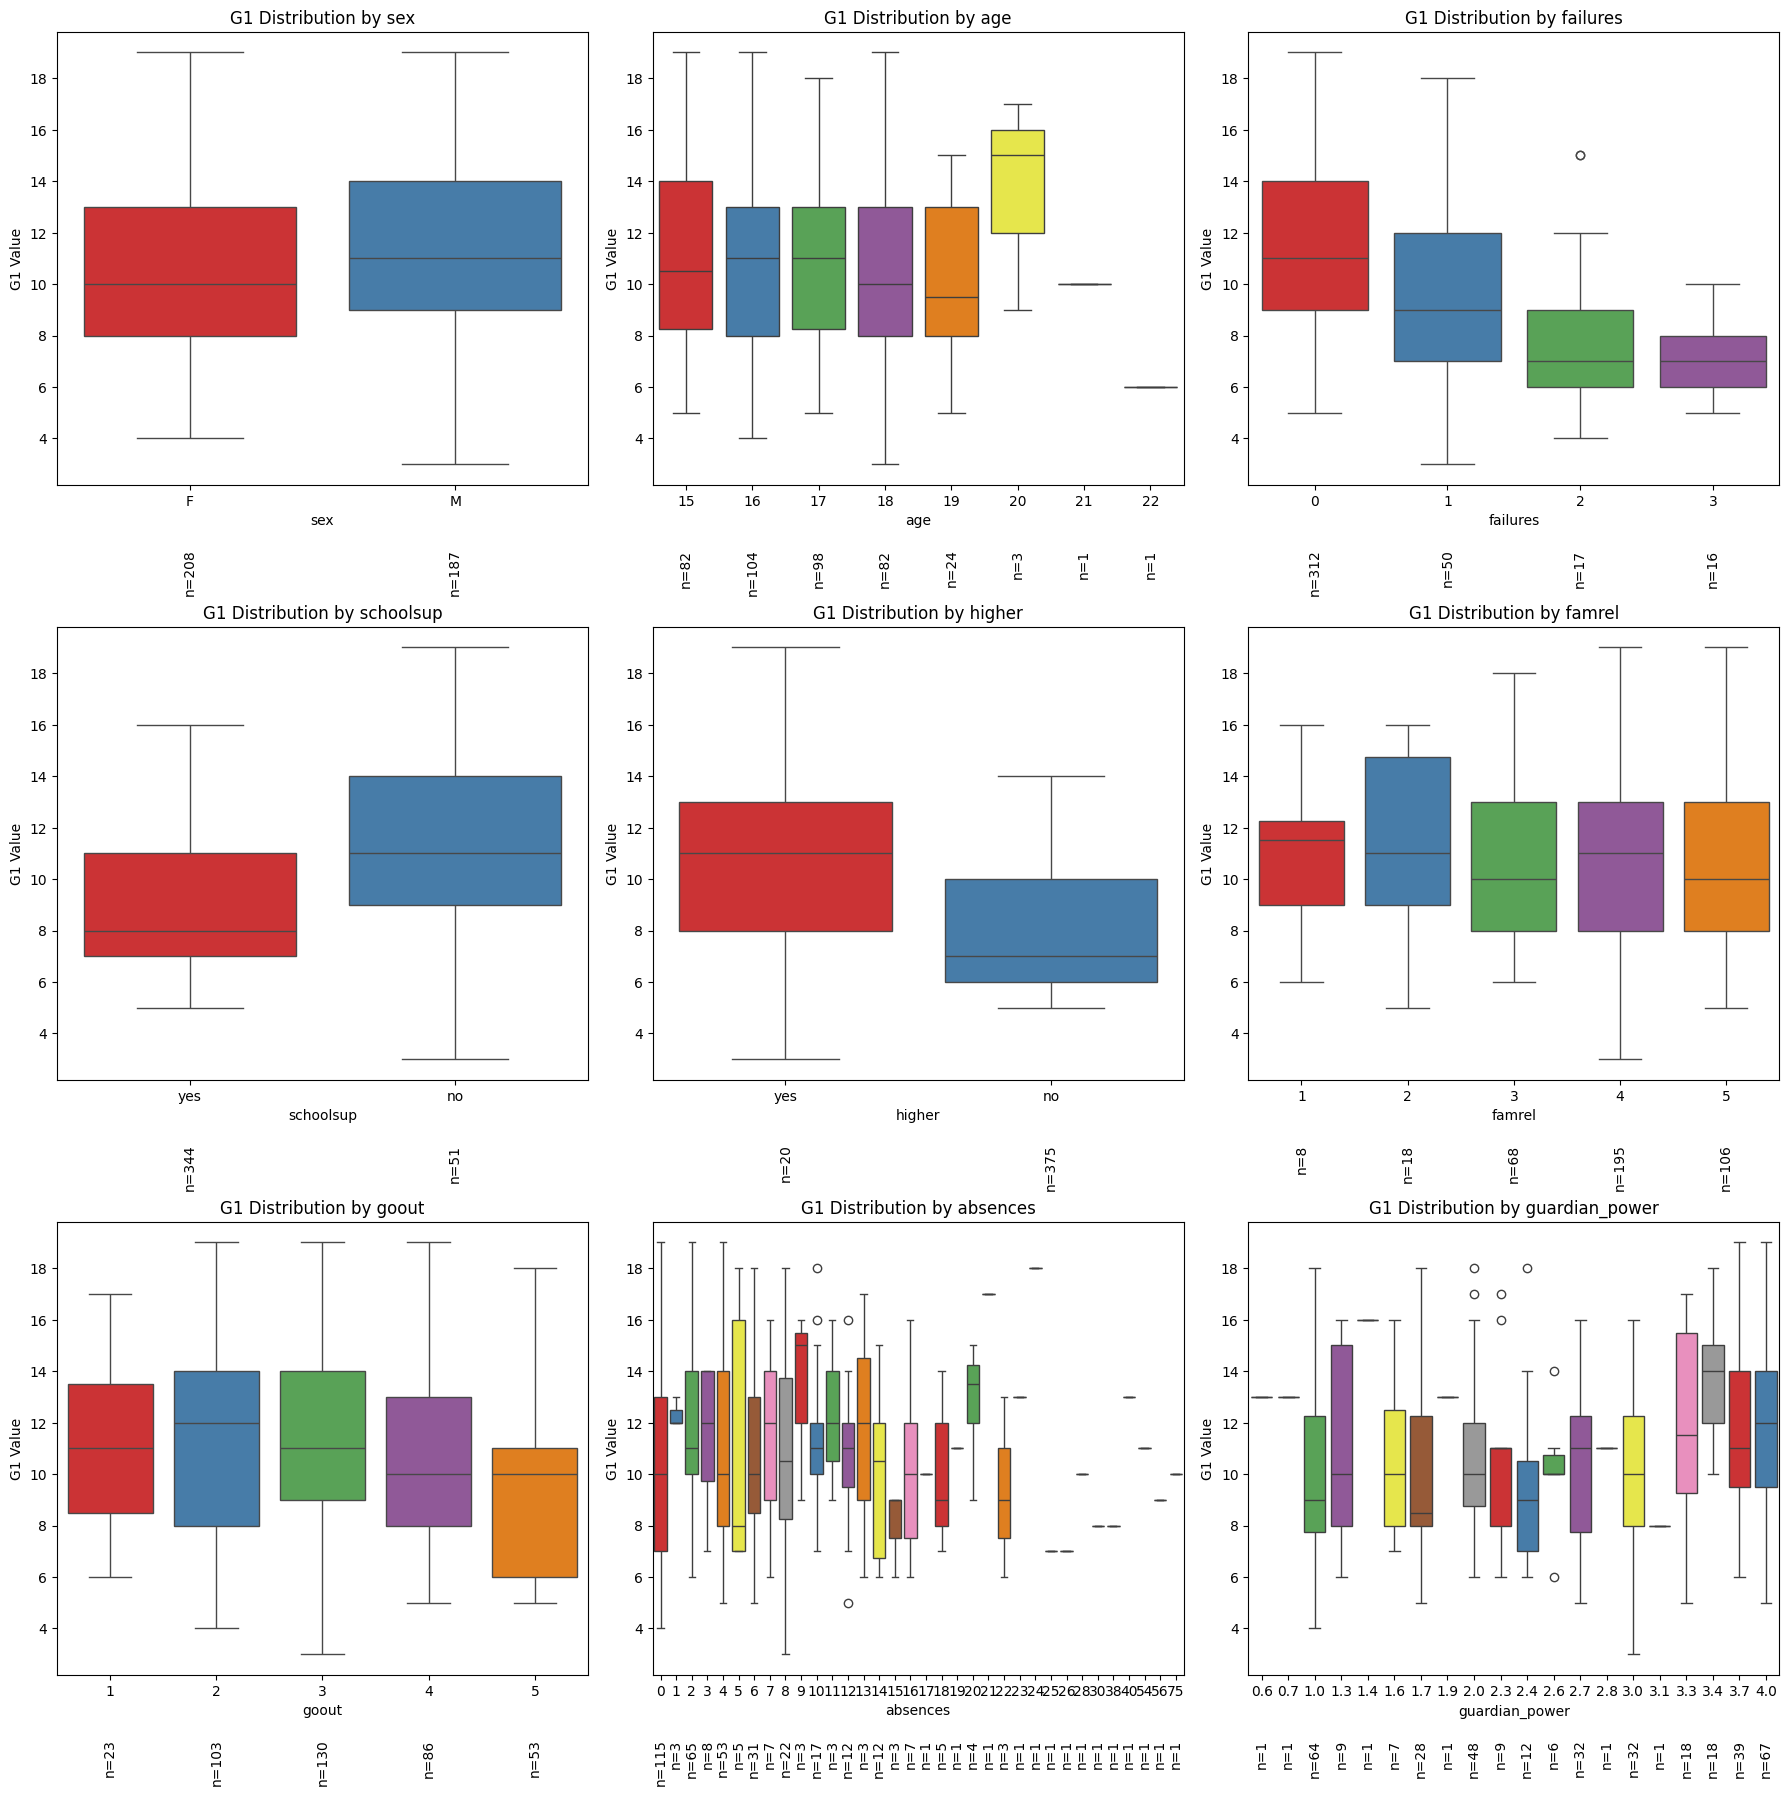

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # 경고 메시지 무시

# 데이터프레임에서 필요한 열만 추출하여 새로운 데이터프레임 생성
selected_columns = ['sex','age','failures','schoolsup','higher','famrel','goout','absences','guardian_power','G1']
selected_data = data[selected_columns]

# 열 각각에 따라 그룹화한 후에 G1 값의 분포를 박스 플롯으로 확인하는 함수
def plot_grouped_boxplot(data, group_column, ax):
    sns.boxplot(x=group_column, y='G1', data=data, ax=ax, palette='Set1')  # 박스 플롯 그리기
    add_count_labels(ax, data, group_column)  # G1 값의 개수 표시
    ax.set_title(f'G1 Distribution by {group_column}')
    ax.set_xlabel(group_column)
    ax.set_ylabel('G1 Value')

def add_count_labels(ax, data, group_column):
    # 각 그룹별 'G1' 값의 개수를 계산
    counts = data.groupby(group_column)['G1'].count().reset_index()
    # 박스 플롯 위에 개수 세로로 표시
    for i, count in enumerate(counts['G1']):
        ax.text(i, -0.3, f'n={count}', ha='center', va='top', fontsize=10,  rotation = 90)

# 총 열의 개수
total_columns = len(selected_data.columns) - 1

# 서브플롯 생성
num_rows = total_columns // 3 + (1 if total_columns % 3 != 0 else 0)
fig, axs = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

# 각 열에 대해 박스 플롯 그리기
for i, column in enumerate(selected_data.columns[:-1]):
    row = i // 3
    col = i % 3
    plot_grouped_boxplot(selected_data, column, axs[row, col])

# 빈 서브플롯 숨기기
for i in range(total_columns, num_rows * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()


In [81]:
selected_data.dtypes

sex                object
age                 int64
failures            int64
schoolsup          object
higher             object
famrel              int64
goout               int64
absences            int64
guardian_power    float64
G1                  int64
dtype: object

In [82]:
# 'absences' 열의 데이터 타입을 확인하고, 필요에 따라 숫자로 변환합니다.
selected_data['absences'] = selected_data['absences'].astype(float)

# 'guardian_power' 열의 데이터 타입을 확인하고, 필요에 따라 숫자로 변환합니다.
selected_data['guardian_power'] = selected_data['guardian_power'].astype(float)

# 열의 값에 따라 새로운 열을 생성하는 조건을 다시 적용합니다.
selected_data['absences'] = selected_data['absences'].apply(lambda x: 'Lower' if x <= 1 else ('Middle' if x <= 5 else 'Upper'))
selected_data['guardian_power'] = selected_data['guardian_power'].apply(lambda x: 'Lower' if x <= 1.9 else ('Middle' if x <= 3.1 else 'Upper'))


selected_data

,sex,age,failures,schoolsup,higher,famrel,goout,absences,guardian_power,G1
0,F,18,0,yes,yes,4,4,Upper,Upper,5
1,F,17,0,no,yes,5,3,Middle,Lower,5
2,F,15,3,yes,yes,4,2,Upper,Lower,7
3,F,15,0,no,yes,3,2,Middle,Upper,15
4,F,16,0,no,yes,4,2,Middle,Middle,6
...,...,...,...,...,...,...,...,...,...,...
390,M,20,2,no,yes,5,4,Upper,Lower,9
391,M,17,0,no,yes,2,5,Middle,Middle,14
392,M,21,3,no,yes,5,3,Middle,Lower,10
393,M,18,0,no,yes,4,1,Lower,Middle,11


In [83]:
# ANOVA 분석을 실시하여 유의한지 살펴보았습니다.
import statsmodels.api as sm
from statsmodels.formula.api import ols

selected_data['age'] = pd.cut(selected_data['age'], bins=[15, 16, 17, 18, 19, 20, 21, 22, 23], labels=['15', '16', '17', '18', '19', '20', '21', '22'])
selected_data['failures'] = pd.cut(selected_data['failures'], bins=[0, 1, 2, 3, 4], labels=['0', '1', '2', '3'])
selected_data['famrel'] = pd.cut(selected_data['famrel'], bins=[1, 2, 3, 4, 5, 6], labels=['1', '2', '3', '4', '5'])
selected_data['goout'] = pd.cut(selected_data['goout'], bins=[1, 2, 3, 4, 5, 6], labels=['1', '2', '3', '4', '5'])

model = ols('G1 ~ sex + age + failures + schoolsup + higher + famrel + goout + absences + guardian_power', data=selected_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# ANOVA 테이블을 데이터프레임으로 변환
anova_df = pd.DataFrame(anova_table)
anova_df.drop(columns=['sum_sq'], inplace=True)
anova_df['df'] = anova_df['df'].apply(lambda x : round(x,2))
anova_df['F'] = anova_df['F'].apply(lambda x : round(x,2))
anova_df['PR(>F)'] = anova_df['PR(>F)'].apply(lambda x : round(x,2))
anova_df

,df,F,PR(>F)
sex,1.0,0.39,0.53
age,7.0,0.85,0.54
failures,3.0,2.40,0.10
schoolsup,1.0,0.59,0.45
higher,1.0,0.23,0.63
famrel,4.0,1.04,0.38
goout,4.0,0.55,0.65
absences,2.0,2.73,0.08
guardian_power,2.0,1.59,0.22
Residual,45.0,NaN,NaN


In [49]:
from scipy.stats import ttest_ind
# 'G1' 값의 평균이 유의미한 차이가 있는지를 이진분류로 값이 나오는 변수에 한해서 확인했습니다.
def perform_ttest(data, group_column):
    grouped_data = data.groupby(group_column)['G1'].apply(list)
    t_statistic, p_value = ttest_ind(*grouped_data.values)
    print(f"T-Statistic for {group_column}: {t_statistic}")
    print(f"P-Value for {group_column}: {p_value}")
    if p_value < 0.05:
        print("There is a significant difference in the means.")
    else:
        print("There is no significant difference in the means.")
# 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid' 열 각각에 대해 t-test 수행
for column in ['sex','schoolsup','higher']:
    perform_ttest(selected_data, column)

T-Statistic for sex: -1.8283673434285317
P-Value for sex: 0.06825227168840965
There is no significant difference in the means.
T-Statistic for schoolsup: 4.313372609988965
P-Value for schoolsup: 2.036142341969172e-05
There is a significant difference in the means.
T-Statistic for higher: -3.5914725162990107
P-Value for higher: 0.00037049239277632854
There is a significant difference in the means.


### 모델 개발을 위한 데이터 전처리를 진행했습니다.
- 모델 개발은 선형 회귀 모델, 랜덤포레스트 분류 모델(2개의 모델)을 이용하기로 했습니다.

### 회귀 모델 설명력 확인했습니다.

In [43]:
# 모든 회귀 모델의 설명력을 확인해보기 위하여 사용하기 위한 라이브러리를 불러왔습니다.
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, StandardScaler, 
                                   MinMaxScaler, PowerTransformer, QuantileTransformer)
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import zscore
# Train, Test 데이터 분리 (이탈 미이탈 값 출력)
from sklearn.model_selection import train_test_split
# Accuracy 측정
from sklearn.metrics import accuracy_score
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

plt.rcParams["font.family"] = 'Malgun gothic'

In [48]:
# 데이터 전처리 및 준비
data2 = data[['sex','age','failures','schoolsup','higher','famrel','goout','absences','guardian_power','G1']]
data2['sex'] = data2['sex'].apply(lambda x : 1 if x == 'M' else 0)
data2['schoolsup'] = data2['schoolsup'].apply(lambda x : 1 if x == 'yes' else 0)
data2['higher'] = data2['higher'].apply(lambda x : 1 if x == 'yes' else 0)

# 클래스 분류는 상대적인 비율을 바탕으로 1, 2, 3, 4 등급으로 나누었습니다.
data2['G1'] = data2['G1'].apply(lambda x: 1 if x <= 8 else (2 if x <= 11 else (3 if x <= 13 else 4)))

# 모델의 학습 성능을 높이기 위해 표준화를 실시했습니다.
scaler = StandardScaler()
scaler.fit(data2.values)
data2 = scaler.transform(data2.values)
data2 = pd.DataFrame(data2)
data2.columns = ['sex','age','failures','schoolsup','higher','famrel','goout','absences','guardian_power','G1']

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

# 회귀 모델들의 설명력을 확인합니다.
X = data2.drop('G1', axis=1)
y = data2['G1']  # y를 1차원으로 변경합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
r2_l = []
rmses = []

# 회귀 모델 설명력 확인을 위한 함수를 만들었습니다.
def result(y_test, y_pred):
    # 회귀 평가 지표 계산
    r2 = r2_score(y_test, y_pred)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    rmses.append(rmse)
    r2_l.append(r2)
    # R-squared (R²): 결정계수, 모델의 설명력을 나타냅니다. 1에 가까울수록 좋습니다.
    print("R-squared:", r2)
    # Root Mean Squared Error (RMSE): 예측값과 실제값 사이의 제곱 거리의 평균의 제곱근입니다. 작을수록 좋습니다.
    print("RMSE:", rmse)

# 다양한 회귀 모델을 생성합니다
# 먼저 default 모델을 설정한 뒤, cross-validation을 통해 성능을 평가하겠습니다.
models = [
    LinearRegression(),
    ElasticNet(random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42),
    LGBMRegressor(random_state=42)
]

# 평가
for model in models:
    name = model.__class__.__name__
    print('Model : %s ' % (name))
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    result(y_test, y_pred)
    print('\n')


Model : LinearRegression 
R-squared: 0.16528300974510612
RMSE: 1.01


Model : ElasticNet 
R-squared: -2.5863852679108845e-05
RMSE: 1.1


Model : DecisionTreeRegressor 
R-squared: -0.5855576246637704
RMSE: 1.39


Model : RandomForestRegressor 
R-squared: -0.051760544850794066
RMSE: 1.13


Model : AdaBoostRegressor 
R-squared: 0.11586796949594413
RMSE: 1.04


Model : GradientBoostingRegressor 
R-squared: 0.00600248839304518
RMSE: 1.1


Model : XGBRegressor 
R-squared: -0.3431096270126952
RMSE: 1.28


Model : LGBMRegressor 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 316, number of used features: 8
[LightGBM] [Info] Start training from score 0.001120
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

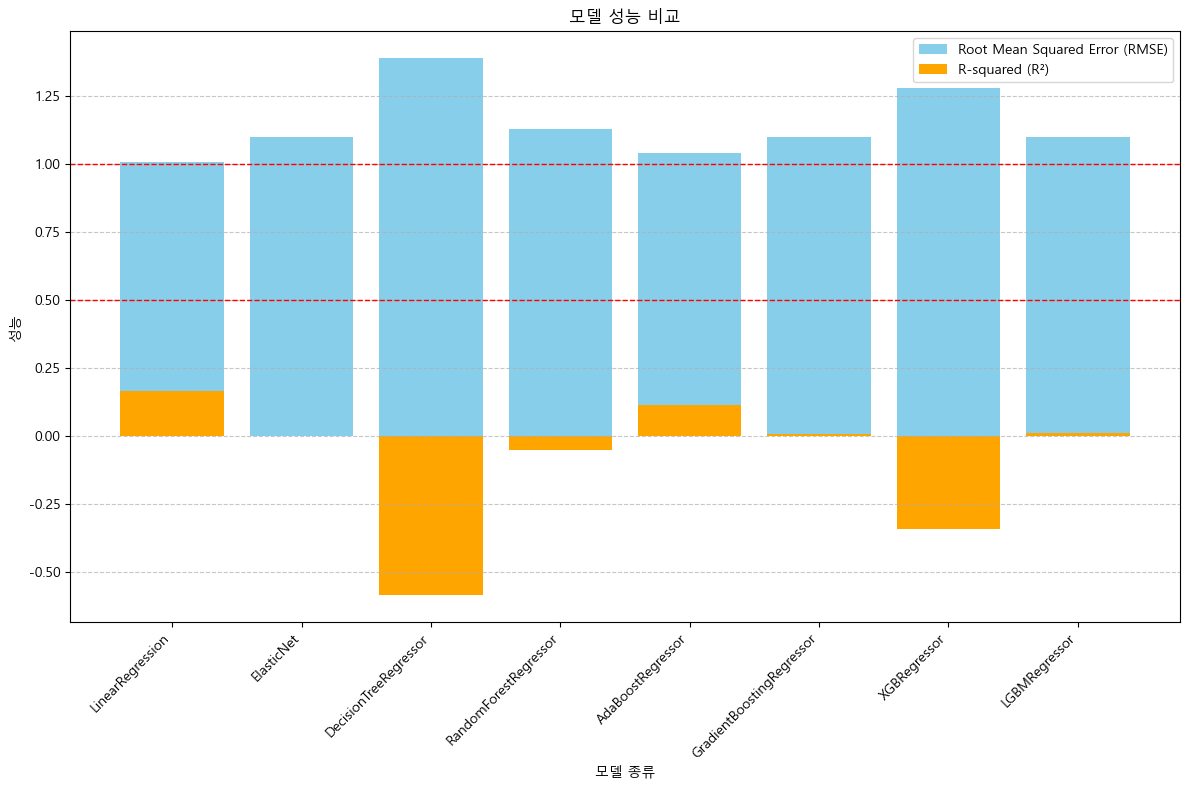

In [60]:
import matplotlib.pyplot as plt

# 모델 이름과 결과 리스트
models = ["LinearRegression", "ElasticNet", "DecisionTreeRegressor", "RandomForestRegressor", 
          "AdaBoostRegressor", "GradientBoostingRegressor", "XGBRegressor", "LGBMRegressor"]

# 그래프 설정
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 8))

# RMS Error와 R-squared를 함께 표시하는 그래프
plt.bar(models, rmses, color='skyblue', label='Root Mean Squared Error (RMSE)')
plt.bar(models, r2_l, color='orange', label='R-squared (R²)')

plt.xlabel("모델 종류")
plt.ylabel("성능")
plt.title("모델 성능 비교")
plt.xticks(rotation=45, ha='right')  # x축 레이블 각도 조정
plt.legend()  # 범례 추가

# 그리드 추가 (선택사항)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 0.5와 1.0에 빨간 점선 추가
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1)
plt.axhline(y=1.0, color='red', linestyle='--', linewidth=1)

# 그래프 출력 및 저장
plt.tight_layout()
plt.savefig('모델 성능 비교.png')
plt.show()


### 랜덤포레스트 분류 모델 성능을 확인했습니다.

In [6]:
# 분류 모델 개발을 위해 필요한 라이브러리를 불러옵니다.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import export_graphviz
import graphviz

In [7]:
# 데이터 전처리 및 준비
data1 = data[['sex','age','failures','schoolsup','higher','famrel','goout','absences','guardian_power','G1']]
data1['sex'] = data1['sex'].apply(lambda x : 1 if x == 'M' else 0)
data1['schoolsup'] = data1['schoolsup'].apply(lambda x : 1 if x == 'yes' else 0)
data1['higher'] = data1['higher'].apply(lambda x : 1 if x == 'yes' else 0)

# 클래스 분류는 상대적인 비율을 바탕으로 A, B, C, D 등급으로 나누었습니다.
data1['G1'] = data1['G1'].apply(lambda x: 'D' if x <= 8 else ('C' if x <= 11 else ('B' if x <= 13 else 'A'))) 

In [8]:
# 랜덤포레스트 모델 개발을 실시합니다.
X = data1.drop('G1', axis=1)
y = data1[['G1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9050)

# RandomForestClassifier
rand_forest = RandomForestClassifier(random_state=12345)

# 하이퍼 파라미터
n_estimators = [100, 200, 300]
max_depth = [4, 6, 8]
max_depth.append(None)
min_samples_split = [5, 10]
min_samples_leaf = [2, 4]

param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

rf_random = GridSearchCV(estimator = rand_forest,
                         param_grid = param_grid,
                         cv = 5,
                         verbose=2,
                         n_jobs = -1)

rf_random.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print('Best Parameters:', rf_random.best_params_)

# 최적의 하이퍼파라미터로 학습된 모델 가져오기
best_model = rf_random.best_estimator_

# accuracy
print(best_model.score(X_test, y_test))

# 예측
y_pred = best_model.predict(X_test)

# precision, recall, f1_score
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
0.48739495798319327
(0.6210076214108472, 0.43454415954415954, 0.4163437484671605, None)


In [83]:
# 모델의 설명력을 확인합니다.

# 학습 결과 추출
best_parameters = rf_random.best_params_
accuracy = best_model.score(X_test, y_test)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# 결과를 딕셔너리에 담기
results = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1_score]
}

# 데이터프레임 생성
results_df = pd.DataFrame(results)
results_df_transposed = results_df.T.rename(columns={0: 'Probability'})
results_df_transposed


,Probability
Accuracy,0.487395
Precision,0.621008
Recall,0.434544
F1 Score,0.416344


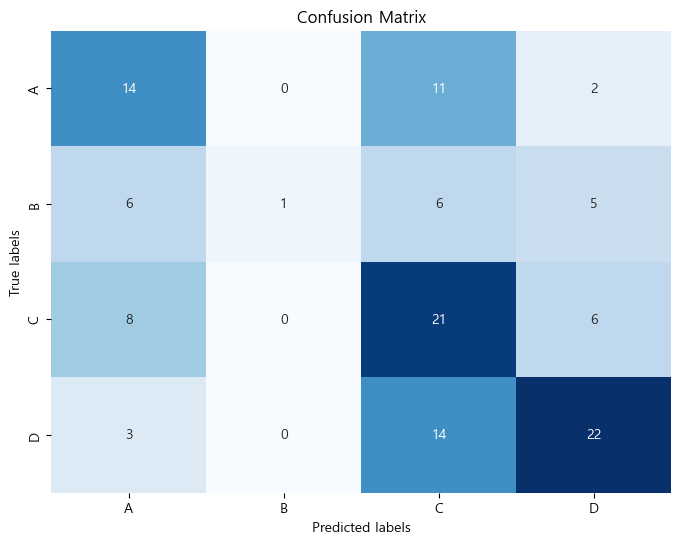

In [92]:
# 실제로 예측을 잘 수행할 수 있도록 

from sklearn.metrics import confusion_matrix
# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['A','B','C','D'],
            yticklabels=['A','B','C','D'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [84]:
import pandas as pd

# 'Best Parameters'를 데이터프레임을 확인합시다.
best_parameters_df = pd.DataFrame(best_parameters.items(), columns=['Parameter', 'Value'])
best_parameters_df

,Parameter,Value
0,max_depth,4
1,min_samples_leaf,2
2,min_samples_split,5
3,n_estimators,200


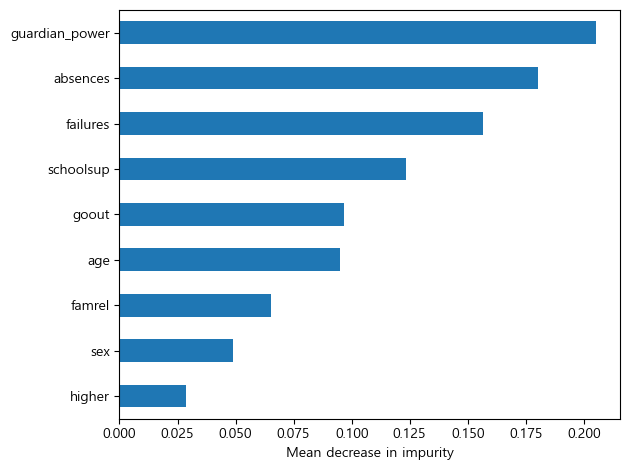

In [85]:
# 특징 중요도를 확인합니다.
importances = best_model.feature_importances_
feature_names = list(X.columns)

forest_importances = pd.Series(importances, index=feature_names)
forest_importances_sorted = forest_importances.sort_values(ascending=True)

fig, ax = plt.subplots()
forest_importances_sorted.plot.barh(ax=ax)
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
# 트리 시각화를 하여 확인했습니다.

estimator = best_model.estimators_[0]
feature_names = X.columns
class_names = ['A','B','C','D']  # 클래스 이름

# 시각화를 위한 DOT 데이터 생성
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

# DOT 데이터를 그래프로 변환
graph = graphviz.Source(dot_data)

graph
########################graphviz 문제로 인하여 colab에서 실행 후 결과를 확인하였습니다.############################